In [1]:
session.run()

2021-08-26 07:58:17,701 - root - INFO - ** Kedro project housing_price_prediction
2021-08-26 07:58:18,346 - kedro.io.data_catalog - INFO - Loading data from `train` (CSVDataSet)...
2021-08-26 07:58:18,378 - kedro.pipeline.node - INFO - Running node: Encoding_Node: encoding([train]) -> [encoded_data]
2021-08-26 07:58:18,417 - kedro.io.data_catalog - INFO - Saving data to `encoded_data` (CSVDataSet)...
2021-08-26 07:58:18,448 - kedro.runner.sequential_runner - INFO - Completed 1 out of 2 tasks
2021-08-26 07:58:18,449 - kedro.io.data_catalog - INFO - Loading data from `encoded_data` (CSVDataSet)...
2021-08-26 07:58:18,462 - kedro.io.data_catalog - INFO - Loading data from `params:test_size` (MemoryDataSet)...
2021-08-26 07:58:18,466 - kedro.pipeline.node - INFO - Running node: Test_Train_Split_Node: split_test_train([encoded_data,params:test_size]) -> [test_data,train_data]
2021-08-26 07:58:18,470 - kedro.io.data_catalog - INFO - Saving data to `train_data` (CSVDataSet)...
2021-08-26 07:5

{}

In [15]:
from causalnex.structure.notears import from_pandas
struct_data = catalog.load("train_data")
struct_data = struct_data.dropna()
struct_data = struct_data.drop(columns=['Id'])
sm = from_pandas(struct_data)

2021-08-26 08:28:24,144 - kedro.io.data_catalog - INFO - Loading data from `train_data` (CSVDataSet)...
2021-08-26 08:28:24,172 - root - INFO - Learning structure using 'NOTEARS' optimisation.


/Users/brandonmeek/opt/anaconda3/envs/kedro-housing/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'MSSubClass', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/Users/brandonmeek/opt/anaconda3/envs/kedro-housing/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'MSSubClass', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


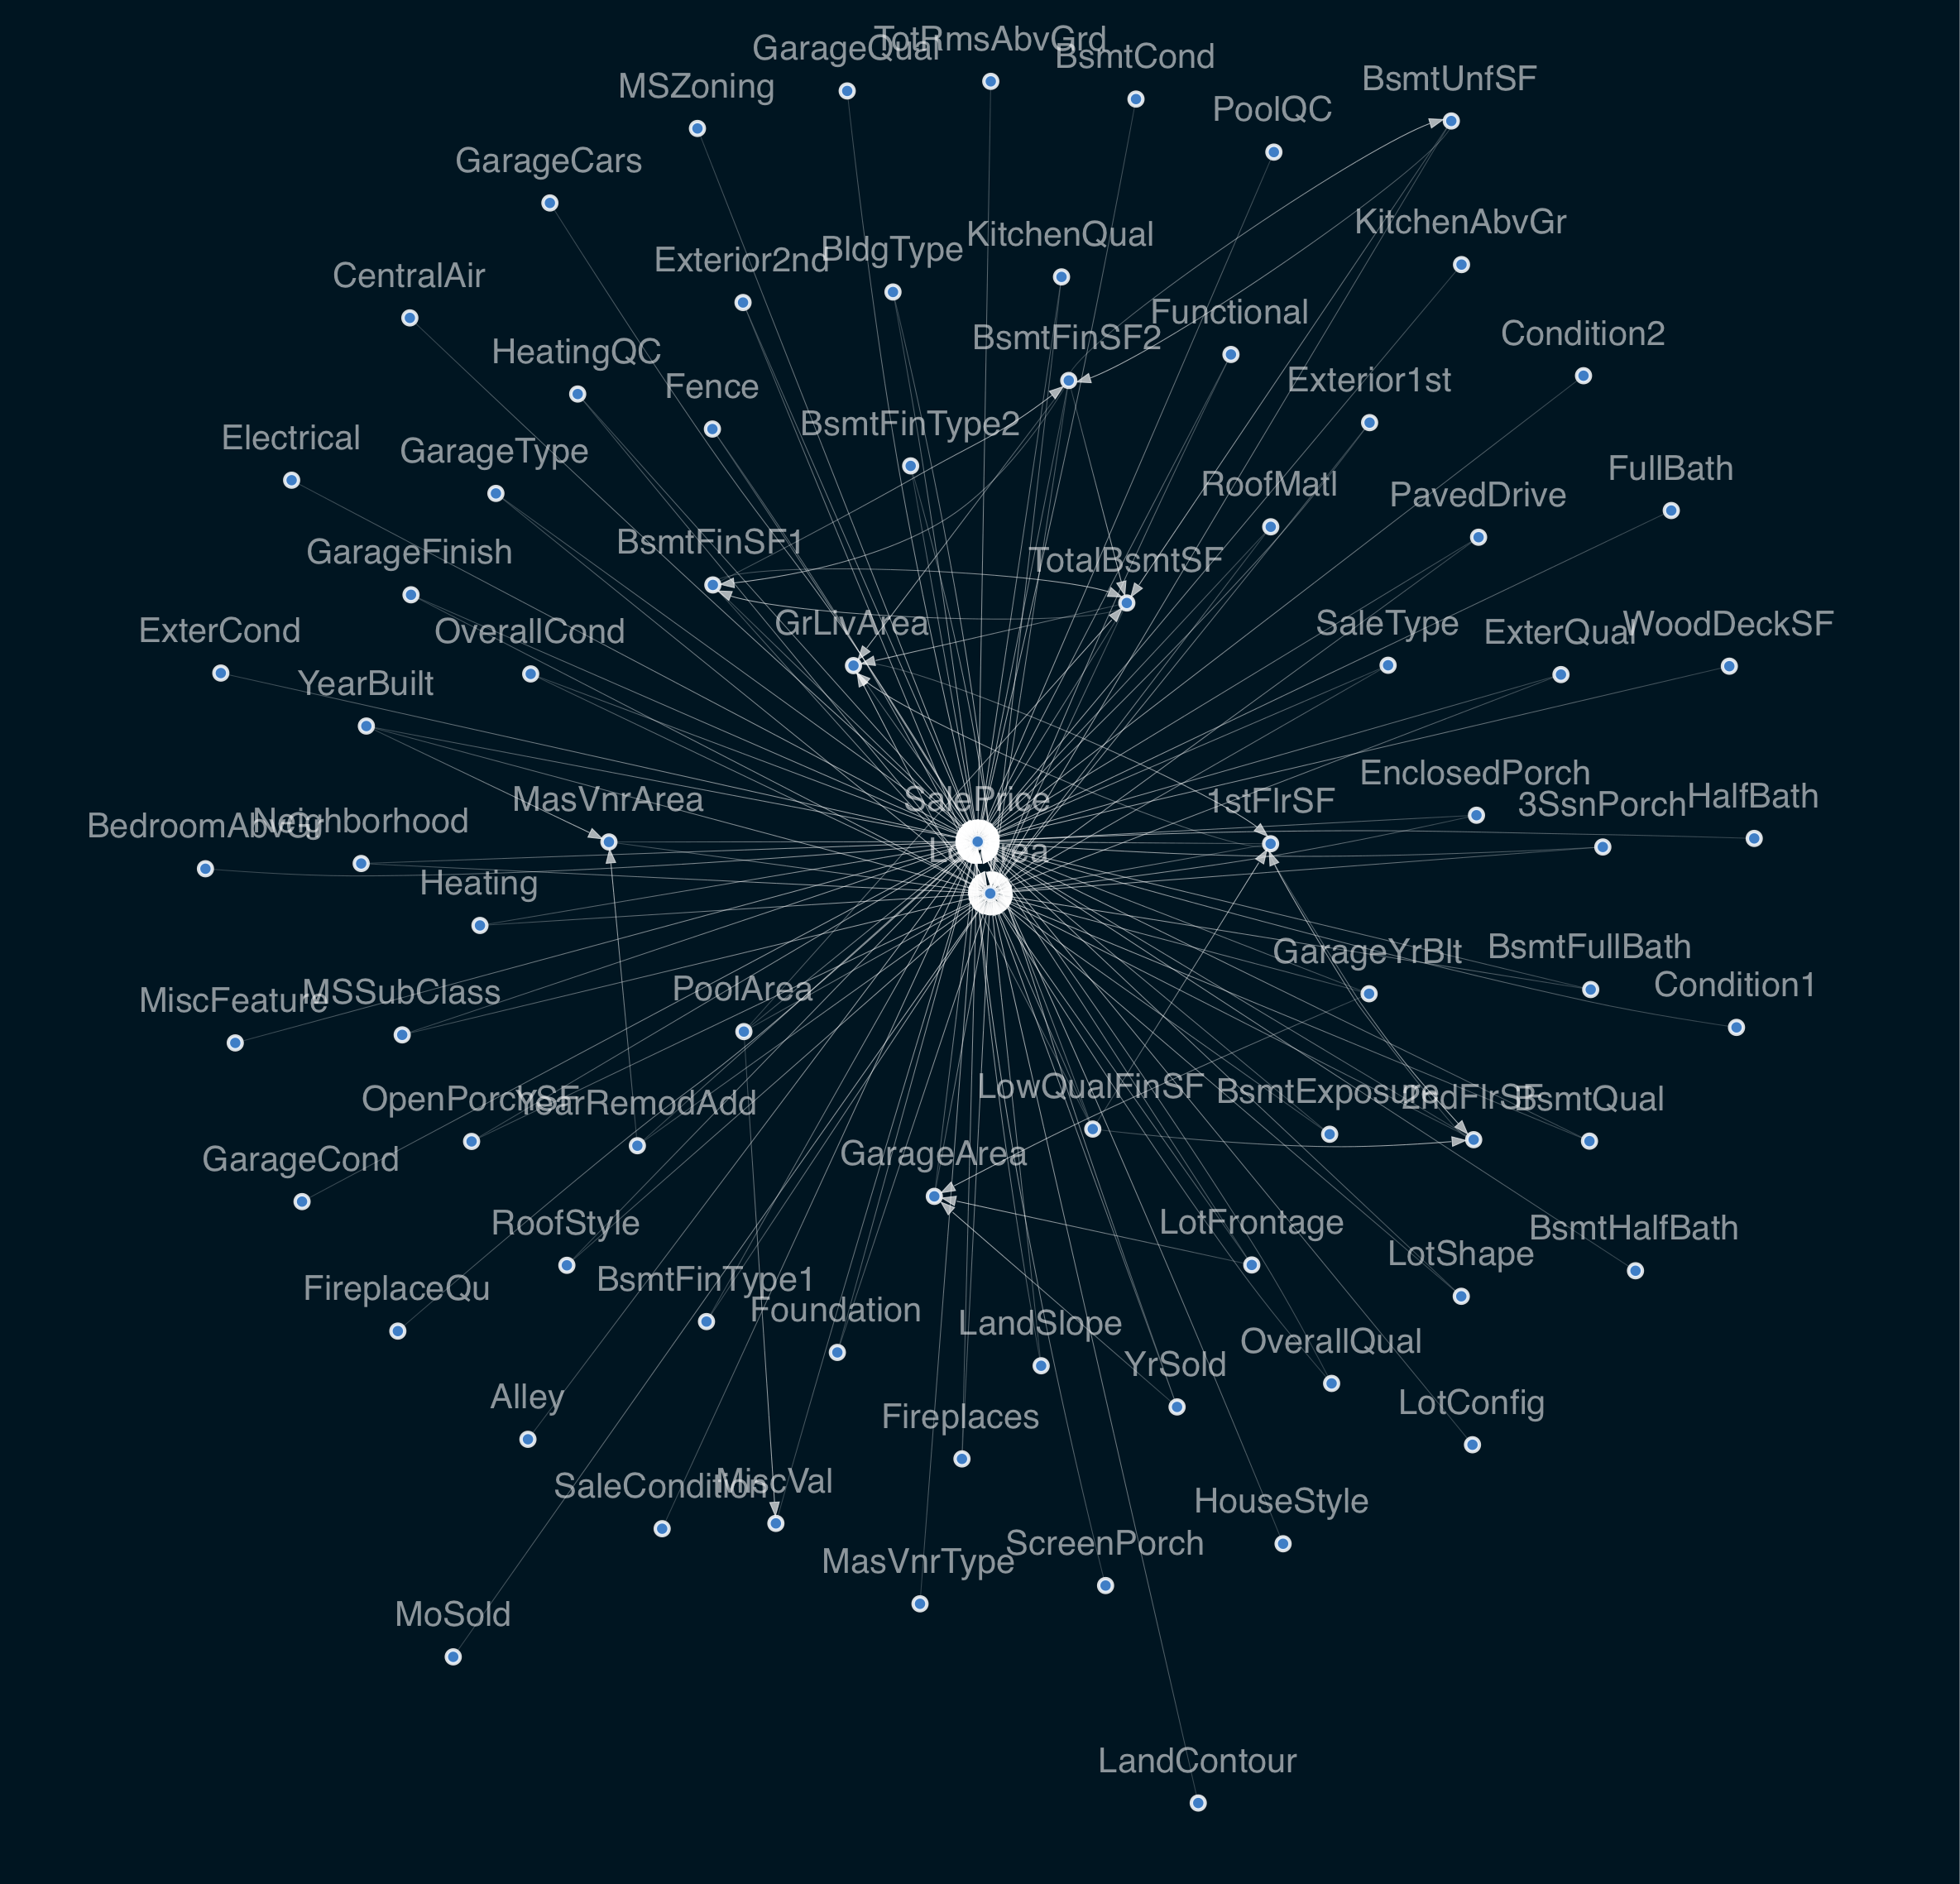

In [16]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
sm.remove_edges_below_threshold(0.8)
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    #graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))